In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import make_column_transformer

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"
df = pd.read_excel(url)

In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Hour,Minute
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,1,7,45
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,1,7,45
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,1,7,45


In [4]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Year', 'Day', 'Hour',
       'Minute'],
      dtype='object')

What item is the best seller in every month based on the dataset?

In [5]:
monthly_sales = df.groupby(['Month', 'StockCode'])['Quantity'].sum().reset_index()
best_sellers = monthly_sales.loc[monthly_sales.groupby('Month')['Quantity'].idxmax()]
best_sellers = best_sellers.merge(df[['StockCode', 'Description']], on='StockCode', how='left')
for month in best_sellers['Month'].unique():
    item_info = best_sellers[best_sellers['Month'] == month].iloc[0]
    print(f"In month {month}, the best-selling item is '{item_info['Description']}' (StockCode: {item_info['StockCode']}) with a quantity of {item_info['Quantity']}.")



In month 1, the best-selling item is 'JAZZ HEARTS MEMO PAD' (StockCode: 20993) with a quantity of 9500.
In month 2, the best-selling item is 'BLACK AND WHITE PAISLEY FLOWER MUG' (StockCode: 37410) with a quantity of 19249.
In month 3, the best-selling item is 'SET/6 WOODLAND PAPER PLATES' (StockCode: 21091) with a quantity of 13107.
In month 4, the best-selling item is 'PACK OF 72 RETRO SPOT CAKE CASES' (StockCode: 21212) with a quantity of 5365.
In month 5, the best-selling item is 'FLAG OF ST GEORGE CAR FLAG' (StockCode: 84016) with a quantity of 11097.
In month 6, the best-selling item is 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' (StockCode: 84077) with a quantity of 5515.
In month 7, the best-selling item is 'PACK OF 72 RETRO SPOT CAKE CASES' (StockCode: 21212) with a quantity of 4181.
In month 8, the best-selling item is 'SET/6 FRUIT SALAD PAPER CUPS' (StockCode: 21088) with a quantity of 7131.
In month 9, the best-selling item is 'BROCADE RING PURSE ' (StockCode: 17003) with a quantity

What item is the best seller in every quarter based on the dataset?

---



In [6]:
df['Quarter'] = df['InvoiceDate'].dt.quarter
quarterly_sales = df.groupby(['Quarter', 'StockCode'])['Quantity'].sum().reset_index()
best_sellers = quarterly_sales.loc[quarterly_sales.groupby('Quarter')['Quantity'].idxmax()]
best_sellers = best_sellers.merge(df[['StockCode', 'Description']], on='StockCode', how='left')
best_sellers = best_sellers[['Quarter', 'StockCode', 'Description', 'Quantity']]
for quarter in best_sellers['Quarter'].unique():
    item_info = best_sellers[best_sellers['Quarter'] == quarter].iloc[0]
    print(f"In quarter {quarter}, the best-selling item is '{item_info['Description']}' (StockCode: {item_info['StockCode']}) with a quantity of {item_info['Quantity']}.")

In quarter 1, the best-selling item is 'BLACK AND WHITE PAISLEY FLOWER MUG' (StockCode: 37410) with a quantity of 24988.
In quarter 2, the best-selling item is 'FLAG OF ST GEORGE CAR FLAG' (StockCode: 84016) with a quantity of 17281.
In quarter 3, the best-selling item is 'BROCADE RING PURSE ' (StockCode: 17003) with a quantity of 17030.
In quarter 4, the best-selling item is 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' (StockCode: 84077) with a quantity of 21478.


Which region is this business most successful in? Calculate the total sales for each country and find the biggest sales.

In [7]:
country_sales = df.groupby('Country')['Quantity'].sum().reset_index()
most_successful_region = country_sales.loc[country_sales['Quantity'].idxmax()]
print("The most successful region for the business is:", most_successful_region['Country'])

The most successful region for the business is: United Kingdom


Which region is this business least successful in? Calculate the total sales for each country and find the lowest sales.*italicized text*

In [8]:
most_successful_region = country_sales.loc[country_sales['Quantity'].idxmin()]
print("The least successful region for the business is:", most_successful_region['Country'])

The least successful region for the business is: Nigeria


What is the largest transaction on an invoice based on the dataset?


In [9]:
df['TotalAmount'] = df['Quantity'] * df['Price']
invoice_totals = df.groupby('Invoice')['TotalAmount'].sum().reset_index()
largest_transaction = invoice_totals.loc[invoice_totals['TotalAmount'].idxmax()]
print("The largest transaction on an invoice is: Total Amount =", largest_transaction['TotalAmount'],
      "Invoice Number =", largest_transaction['Invoice'])

The largest transaction on an invoice is: Total Amount = 49844.990000000005 Invoice Number = 533027


What is the mean revenue of this business per month?


In [10]:
mean_revenue_per_month = df.groupby('Month')['TotalAmount'].sum().mean()
print("The mean revenue of the business per month is:", mean_revenue_per_month)

The mean revenue of the business per month is: 794957.0528333333


Calculate total revenue for this business for each month based on the dataset

In [11]:
monthly_revenue = df.groupby('Month')['TotalAmount'].sum()
for month, revenue in monthly_revenue.items():
    print(f"Month {month}: Total Revenue = {revenue}")


Month 1: Total Revenue = 624032.892
Month 2: Total Revenue = 533091.426
Month 3: Total Revenue = 765848.761
Month 4: Total Revenue = 590580.432
Month 5: Total Revenue = 615322.83
Month 6: Total Revenue = 679786.61
Month 7: Total Revenue = 575236.36
Month 8: Total Revenue = 656776.34
Month 9: Total Revenue = 853650.431
Month 10: Total Revenue = 1045168.35
Month 11: Total Revenue = 1422654.642
Month 12: Total Revenue = 1177335.56


Calculate the average number of transactions per month for this business.

---




In [12]:
monthly_transactions = df.groupby('Month')['Invoice'].nunique()
average_transactions_per_month = monthly_transactions.mean()
print("The average number of transactions per month for this business is:", average_transactions_per_month)


The average number of transactions per month for this business is: 2401.3333333333335


Calculate the average total sales on the invoice for this business.

In [13]:
invoice_total_sales = df.groupby('Invoice')['TotalAmount'].sum()
average_total_sales_per_invoice = invoice_total_sales.mean()
print("The average total sales on each invoice for this business is:", average_total_sales_per_invoice)




The average total sales on each invoice for this business is: 331.0481896862854


Predict the average revenue per month by multiplying the average number of transactions (invoices) with the average total sales per invoice.

In [14]:
print(average_transactions_per_month * average_total_sales_per_invoice)

794957.0528333334


Build a linear regression model that best predicts the total sales per month for this business by using appropriate variables. Compare it to the previous prediction. Calculate the MSE and r2 Score.

In [15]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalAmount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.month
X = monthly_sales[['Month']]
y = monthly_sales['TotalAmount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

LMCoef = model.coef_
LMInter = model.intercept_

print("Linear Regression Model Parameters - ", "Coefficients: ", LMCoef, " Model Intercept: ", LMInter, "\n")

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Linear Regression Model Parameters -  Coefficients:  [2513.43628315]  Model Intercept:  631755.3146577062 

Mean Squared Error:  213762645808.79013
R^2 Score:  -1.6924138549607326


<Axes: xlabel='Month', ylabel='TotalAmount'>

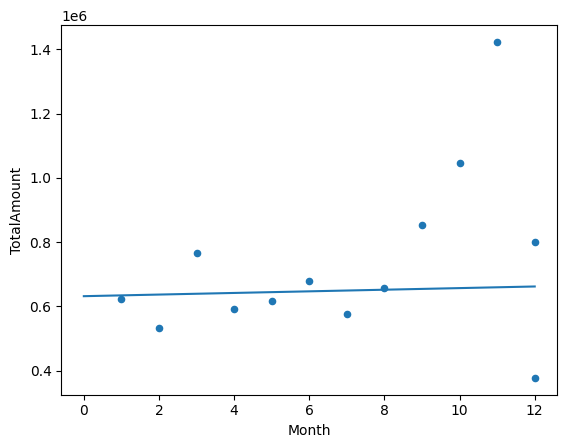

In [16]:
# Graph of Linear Regression Model

X_new = pd.DataFrame()
X_new["Month"] = np.linspace(0, 12, num=60)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Month"]
)

# Plot the predictions.
monthly_sales.plot.scatter(x="Month", y="TotalAmount")
y_new_.plot.line()

########################################
K-Means questions tbd

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Price', ylabel='Quantity'>

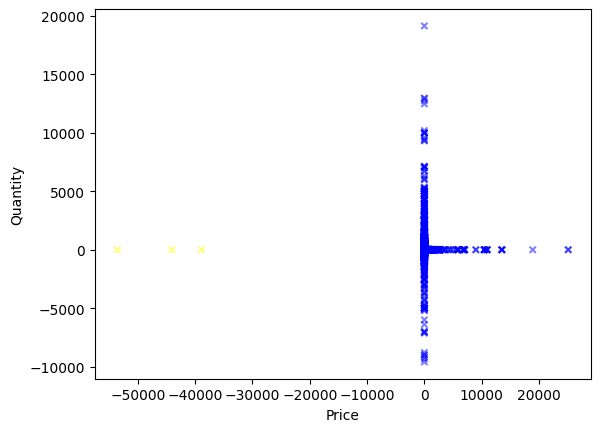

In [17]:
# K - Means Cluster
X_train = df[["Price", "Quantity"]]
#X_train = pd.get_dummies(X_train)
#X_train.dropna(inplace=True)


#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_std = scaler.transform(X_train)

model = KMeans(n_clusters=2)
model.fit(X_train)

clusters = pd.Series(model.labels_).map({
    0: "blue",
    1: "yellow",
})

X_train.plot.scatter(x="Price", y="Quantity",
                     c=clusters, marker="x", alpha=.5)

##########

Build a KNN regression model that best predicts the total sales per month for this business by using appropriate variables. Use hyperparameter tuning to determine the best value of K to use in the model. Compare it to the previous predictions and results from the linear regression model


In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Hour,Minute,Quarter,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,1,7,45,4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,1,7,45,4,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,1,7,45,4,30.0


,0
9,3.324752e+10
7,3.460870e+10
8,3.524540e+10
6,3.804411e+10
5,3.939829e+10
4,4.437263e+10
3,4.793112e+10
2,6.212064e+10
1,1.033543e+11


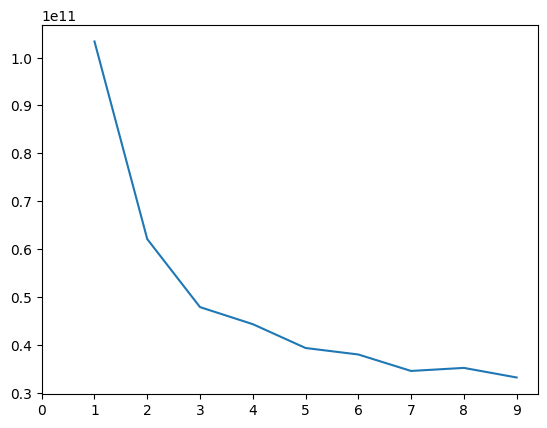

In [19]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalAmount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.month
X = monthly_sales[['Month']]
y = monthly_sales['TotalAmount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for KNN Model

def get_cv_error(k):
  knn_model = make_pipeline(
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=k)
  )

  cv_errs = -cross_val_score(knn_model, X=X_train, y=y_train,
                             scoring="neg_mean_squared_error", cv=10)
  return cv_errs.mean()

ks = pd.Series(range(1, 10))
ks.index = range(1, 10)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line(xticks=range(0,10))
test_errs.sort_values()

In [20]:
knn_model = KNeighborsRegressor(n_neighbors = 9)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", knn_mse)
print("R^2 Score: ", knn_r2)

Mean Squared Error:  221201646981.31482
R^2 Score:  -1.7861106266684068


In [21]:
monthly_sales.head()

,InvoiceDate,TotalAmount,Month
0,2009-12,799847.110,12
1,2010-01,624032.892,1
2,2010-02,533091.426,2
3,2010-03,765848.761,3
4,2010-04,590580.432,4


<Axes: xlabel='Month', ylabel='TotalAmount'>

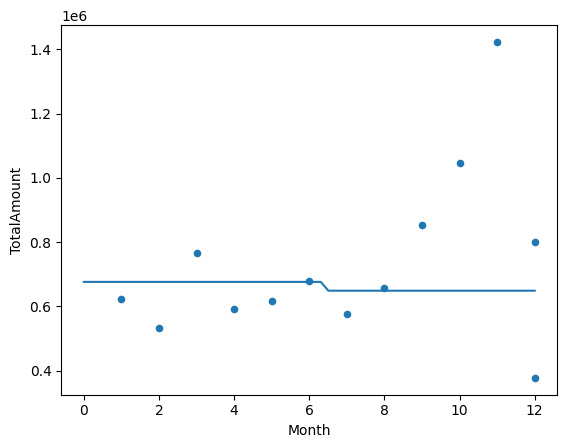

In [22]:
# Graph of KNN Model

X_new = pd.DataFrame()
X_new["Month"] = np.linspace(0, 12, num=60)

# Make predictions at those feature values.
y_new_ = pd.Series(
    knn_model.predict(X_new),
    index=X_new["Month"]
)

# Plot the predictions.
monthly_sales.plot.scatter(x="Month", y="TotalAmount")
y_new_.plot.line()

<Axes: xlabel='Month', ylabel='TotalAmount'>

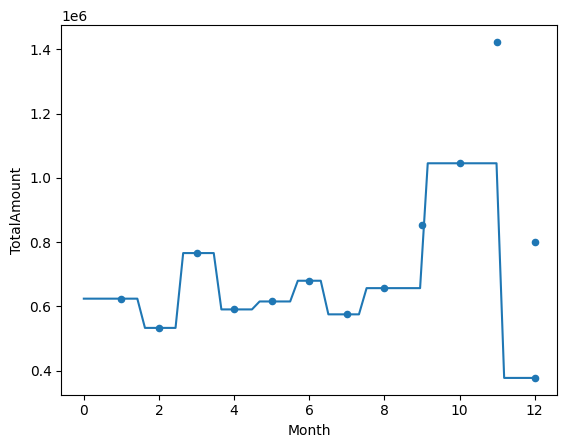

In [23]:
# KNN Model with K = 1
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

X_new = pd.DataFrame()
X_new["Month"] = np.linspace(0, 12, num=60)

# Make predictions at those feature values.
y_new_ = pd.Series(
    knn_model.predict(X_new),
    index=X_new["Month"]
)

# Plot the predictions.
monthly_sales.plot.scatter(x="Month", y="TotalAmount")
y_new_.plot.line()

What is the best selling product for each country?

In [24]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Year', 'Day', 'Hour',
       'Minute', 'Quarter', 'TotalAmount'],
      dtype='object')

In [25]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [26]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Hour,Minute,Quarter,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,1,7,45,4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,1,7,45,4,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,1,7,45,4,30.0


In [27]:
country_sales = df.groupby(['Country', 'StockCode'])['Quantity'].sum().reset_index()
country_best_seller = country_sales.loc[country_sales.groupby('Country')['Quantity'].idxmax()]
country_best_seller = country_best_seller.merge(df[['StockCode', 'Description']], on='StockCode', how='left')
country_best_seller.head()

,Country,StockCode,Quantity,Description
0,Australia,22951,504,72 CAKE CASES DOLLY GIRL DESIGN
1,Australia,22951,504,72 CAKE CASES DOLLY GIRL DESIGN
2,Australia,22951,504,72 CAKE CASES DOLLY GIRL DESIGN
3,Australia,22951,504,60 CAKE CASES DOLLY GIRL DESIGN
4,Australia,22951,504,60 CAKE CASES DOLLY GIRL DESIGN


In [28]:
for country in country_best_seller['Country'].unique():
  item_info = country_best_seller[country_best_seller['Country'] == country].iloc[0]
  print(f"For Country {country}, the best-selling item is '{item_info['Description']}' (StockCode: {item_info['StockCode']}) with a quantity of {item_info['Quantity']}.")

For Country Australia, the best-selling item is '72 CAKE CASES DOLLY GIRL DESIGN' (StockCode: 22951) with a quantity of 504.
For Country Austria, the best-selling item is 'MINI HIGHLIGHTER PENS' (StockCode: 16033) with a quantity of 120.
For Country Bahrain, the best-selling item is 'WHITE TALL PORCELAIN T-LIGHT HOLDER' (StockCode: 18097C) with a quantity of 102.
For Country Belgium, the best-selling item is 'PACK OF 72 RETRO SPOT CAKE CASES' (StockCode: 21212) with a quantity of 336.
For Country Bermuda, the best-selling item is 'GIRLS ALPHABET IRON ON PATCHES ' (StockCode: 84568) with a quantity of 1152.
For Country Brazil, the best-selling item is 'DRAGONS BLOOD INCENSE' (StockCode: 17084P) with a quantity of 25.
For Country Canada, the best-selling item is 'JAZZ HEARTS ADDRESS BOOK' (StockCode: 20996) with a quantity of 24.
For Country Channel Islands, the best-selling item is 'JUMBO BAG PINK WITH WHITE SPOTS' (StockCode: 22386) with a quantity of 330.
For Country Cyprus, the best-

What is the product that generates the most revenue for each country?

In [29]:
country_product_revenue = df.groupby(['Country', 'Description'])['TotalAmount'].sum()
best_country_product = country_product_revenue.groupby('Country').idxmax()
country_winning_product = country_product_revenue.loc[best_country_product]
country_winning_product

,,TotalAmount
Country,Description,
Australia,REGENCY CAKESTAND 3 TIER,927.00
Austria,POSTAGE,1520.00
Bahrain,WHITE TALL PORCELAIN T-LIGHT HOLDER,202.50
Belgium,POSTAGE,2398.00
Bermuda,BOYS ALPHABET IRON ON PATCHES,241.92
Brazil,FRENCH PAISLEY CUSHION COVER,17.70
Canada,RETROSPOT SMALL TUBE MATCHES,33.00
Channel Islands,AFGHAN SLIPPER SOCK PAIR,885.00
Cyprus,REGENCY CAKESTAND 3 TIER,567.15


In [30]:
country_product_revenue = df.groupby(['Country', 'StockCode'])['TotalAmount'].sum().reset_index()
best_country_product = country_product_revenue.loc[country_product_revenue.groupby('Country')['TotalAmount'].idxmax()]
best_country_product = best_country_product.merge(df[['StockCode', 'Description']], on='StockCode', how='left')

for country in best_country_product['Country'].unique():
  item_info = best_country_product[best_country_product['Country'] == country].iloc[0]
  print(f"For Country {country}, the product that generates the most revenue is '{item_info['Description']}' (StockCode: {item_info['StockCode']}) with total sales of ${item_info['TotalAmount']}.")

For Country Australia, the product that generates the most revenue is 'REGENCY CAKESTAND 3 TIER' (StockCode: 22423) with total sales of $927.0.
For Country Austria, the product that generates the most revenue is 'POSTAGE' (StockCode: POST) with total sales of $1520.0.
For Country Bahrain, the product that generates the most revenue is 'WHITE TALL PORCELAIN T-LIGHT HOLDER' (StockCode: 18097C) with total sales of $202.5.
For Country Belgium, the product that generates the most revenue is 'POSTAGE' (StockCode: POST) with total sales of $2398.0.
For Country Bermuda, the product that generates the most revenue is 'GIRLS ALPHABET IRON ON PATCHES ' (StockCode: 84568) with total sales of $241.92.
For Country Brazil, the product that generates the most revenue is 'FRENCH PAISLEY CUSHION COVER ' (StockCode: 20839) with total sales of $17.700000000000003.
For Country Canada, the product that generates the most revenue is 'RETRO SPOT SMALL TUBE MATCHES' (StockCode: 21584) with total sales of $33.0

############################################ Classification Model ####################
Can customers be segmented based on purchasing behavior (frequent buyer, seasonal buyer, occasional buyer, etc.) through the use of clustering?
This is done through feature engineering the variables purchase quantity per month, purchase amount ($) per month, purchase amount ($) per year, purchase quantity per year, and using these variables as predictors. Then clusters can be visualized with scatterplots of these variables


In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Hour,Minute,Quarter,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,1,7,45,4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,1,7,45,4,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,1,7,45,4,30.0


In [32]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Year', 'Day', 'Hour',
       'Minute', 'Quarter', 'TotalAmount'],
      dtype='object')

In [33]:
# Feature Engineering Puchase Variables For Each Unique Customer

MonthlyPurchaseQuantity = df.groupby(['Customer ID', 'Month'])['Quantity'].sum().reset_index()
MonthlyPurchaseQuantity
df = pd.merge(df, MonthlyPurchaseQuantity, on= ['Customer ID', 'Month'], suffixes= ['', '_perMonth'])

MonthlyPurchaseAmount = df.groupby(['Customer ID', 'Month'])['TotalAmount'].sum().reset_index()
MonthlyPurchaseAmount
df = pd.merge(df, MonthlyPurchaseAmount, on= ['Customer ID', 'Month'], suffixes= ['', '_perMonth'])

YearlyPurchaseQuantity = df.groupby(['Customer ID', 'Year'])['Quantity'].sum().reset_index()
YearlyPurchaseQuantity
df  = pd.merge(df, YearlyPurchaseQuantity, on= ['Customer ID', 'Year'], suffixes= ['', '_perYear'])

YearlyPurchaseAmount = df.groupby(['Customer ID', 'Year'])['TotalAmount'].sum().reset_index()
YearlyPurchaseAmount
df = pd.merge(df, YearlyPurchaseAmount, on= ['Customer ID', 'Year'], suffixes= ['', '_perYear'])

In [34]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Hour,Minute,Quarter,TotalAmount,Quantity_perMonth,TotalAmount_perMonth,Quantity_perYear,TotalAmount_perYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,1,7,45,4,83.4,376,1096.8,376,1096.8
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0,376,1096.8,376,1096.8
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,7,45,4,81.0,376,1096.8,376,1096.8
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,1,7,45,4,100.8,376,1096.8,376,1096.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,1,7,45,4,30.0,376,1096.8,376,1096.8


In [35]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Year', 'Day', 'Hour',
       'Minute', 'Quarter', 'TotalAmount', 'Quantity_perMonth',
       'TotalAmount_perMonth', 'Quantity_perYear', 'TotalAmount_perYear'],
      dtype='object')

In [36]:
YearlyPurchaseQuantity

,Customer ID,Year,Quantity
0,12346.0,2009,26
1,12346.0,2010,26
2,12347.0,2010,828
3,12348.0,2010,373
4,12349.0,2009,-5
...,...,...,...
5298,18285.0,2010,145
5299,18286.0,2009,114
5300,18286.0,2010,478
5301,18287.0,2009,-2


In [37]:
# K - Means Cluster
X_train = df[['Quantity_perMonth', 'TotalAmount_perMonth', 'Quantity_perYear',  'TotalAmount_perYear']]

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_std = scaler.transform(X_train)

model = KMeans(n_clusters=4) # 4 Clusters were chosen as this seems to provide the most distinct clusters
model.fit(X_train)

purchaseColors = pd.Series(model.labels_).map({
    0: "blue",
    1: "yellow",
    2: "green",
    3: "red"
})

purchaseClusters = model.labels_

df['PurchaseClusters'] = purchaseClusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
df['PurchaseClusters'].value_counts()

,count
PurchaseClusters,
0,386641
2,19880
1,8772
3,2241


In [39]:
df['Quantity_perYear'].size

417534

<Axes: xlabel='Quantity_perMonth', ylabel='TotalAmount_perMonth'>

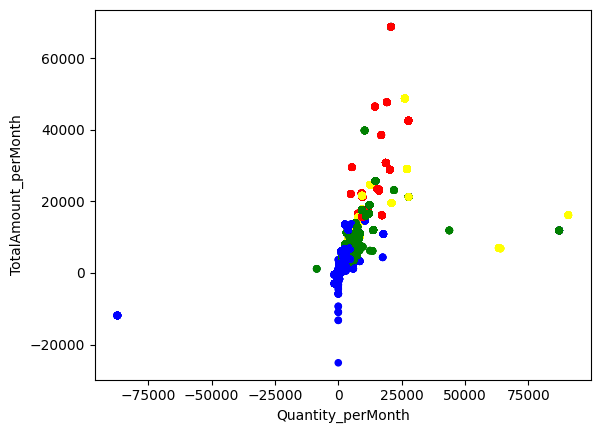

In [40]:
# Base Clustering Scatter Plot between quantity a customer purchased for a given month and total amount spent for that month
df.plot.scatter(x= 'Quantity_perMonth', y= 'TotalAmount_perMonth', c= purchaseColors)

<Axes: xlabel='Quantity_perMonth', ylabel='TotalAmount_perMonth'>

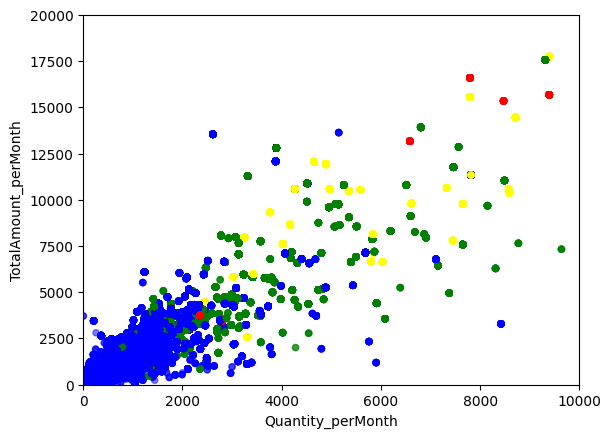

In [41]:
# Limiting plot size to remove extreme observations and allow for break-down of clusters
df.plot.scatter(x= 'Quantity_perMonth', y= 'TotalAmount_perMonth', c= purchaseColors, xlim= (0,10000), ylim= (0,20000), alpha= 0.5)

<Axes: xlabel='Quantity_perYear', ylabel='TotalAmount_perYear'>

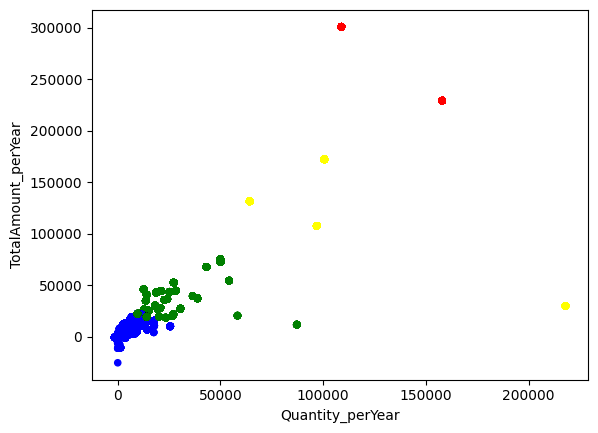

In [42]:
# Base Clustering Scatter Plot between quantity a customer purchased for a given year and total amount spent for that year
df.plot.scatter(x= 'Quantity_perYear', y= 'TotalAmount_perYear', c= purchaseColors)

<Axes: xlabel='Quantity_perYear', ylabel='TotalAmount_perYear'>

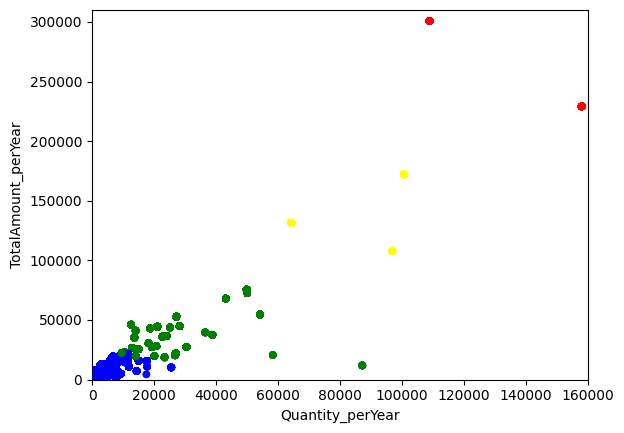

In [43]:
# Limiting plot size to remove extreme observations and allow for break-down of clusters
df.plot.scatter(x= 'Quantity_perYear', y= 'TotalAmount_perYear', c= purchaseColors, xlim= (0,160000), ylim= (0,310000), alpha= 0.5)

<Axes: xlabel='Quantity_perMonth', ylabel='Quantity_perYear'>

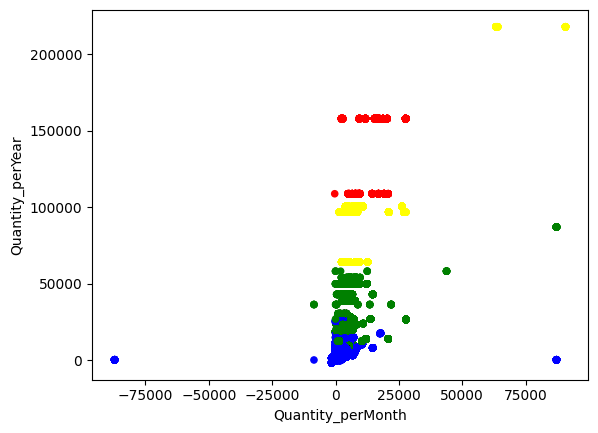

In [44]:
# Comparing Quantity Per Month to Quantity Per Year
df.plot.scatter(x= 'Quantity_perMonth', y= 'Quantity_perYear', c= purchaseColors)

<Axes: xlabel='Quantity_perMonth', ylabel='Quantity_perYear'>

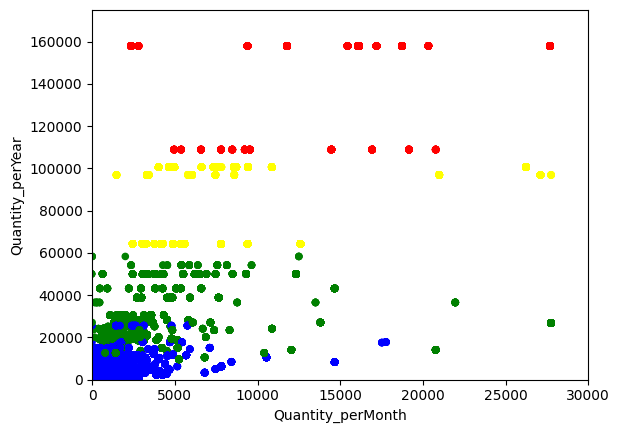

In [45]:
# Comparing Quantity Per Month to Quantity Per Year excluding unusual observations
df.plot.scatter(x= 'Quantity_perMonth', y= 'Quantity_perYear', c= purchaseColors, xlim= (0, 30000), ylim= (0, 175000))

<Axes: xlabel='TotalAmount_perMonth', ylabel='TotalAmount_perYear'>

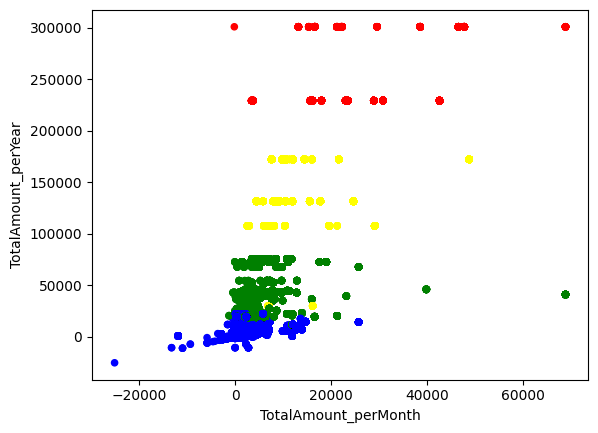

In [46]:
# Comparing Amount Purchased Per Month to Amount Purchased Per Year
df.plot.scatter(x= 'TotalAmount_perMonth', y= 'TotalAmount_perYear', c= purchaseColors)

<Axes: xlabel='TotalAmount_perMonth', ylabel='TotalAmount_perYear'>

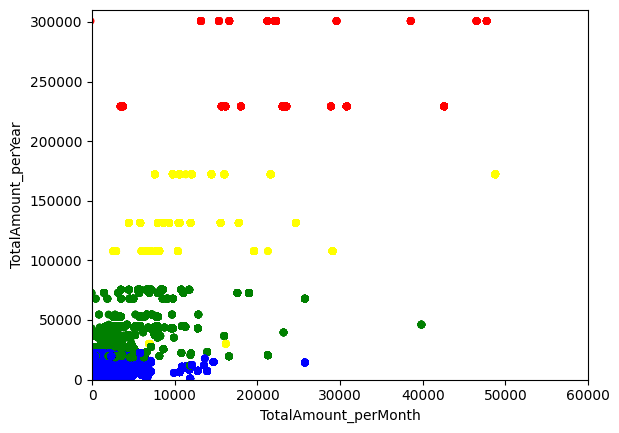

In [47]:
# Comparing Amount Purchased Per Month to Amount Purchased Per Year excluding unusual observations
df.plot.scatter(x= 'TotalAmount_perMonth', y= 'TotalAmount_perYear', c= purchaseColors, xlim= (0,60000), ylim= (0, 310000))

############################ Classification #######################
Can we determine if a customer will be a repeat customer based on purchase history using classification models?
Use oldest 80% of the sales data in training a classification model, and use most recent 20% as a validation set for evaluating accuracy of our predictions. Use feature engineering for whether or not was repeat customer.


In [48]:
# Negative quantity in the data set reflects an item being returned
Returns = df[df['Quantity'] < 0]
Returns.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Hour,Minute,Quarter,TotalAmount,Quantity_perMonth,TotalAmount_perMonth,Quantity_perYear,TotalAmount_perYear,PurchaseClusters
59,C491823,22111,SCOTTIE DOG HOT WATER BOTTLE,-1,2009-12-14 13:55:00,4.25,13078.0,United Kingdom,12,2009,14,13,55,4,-4.25,886,2792.69,735,2278.3,0
60,C491823,21463,MIRRORED DISCO BALL,-1,2009-12-14 13:55:00,4.95,13078.0,United Kingdom,12,2009,14,13,55,4,-4.95,886,2792.69,735,2278.3,0


In [49]:
df[df['Invoice'] == 'C491823']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,Hour,Minute,Quarter,TotalAmount,Quantity_perMonth,TotalAmount_perMonth,Quantity_perYear,TotalAmount_perYear,PurchaseClusters
59,C491823,22111,SCOTTIE DOG HOT WATER BOTTLE,-1,2009-12-14 13:55:00,4.25,13078.0,United Kingdom,12,2009,14,13,55,4,-4.25,886,2792.69,735,2278.3,0
60,C491823,21463,MIRRORED DISCO BALL,-1,2009-12-14 13:55:00,4.95,13078.0,United Kingdom,12,2009,14,13,55,4,-4.95,886,2792.69,735,2278.3,0
61,C491823,35004B,SET OF 3 BLACK FLYING DUCKS,-4,2009-12-14 13:55:00,1.95,13078.0,United Kingdom,12,2009,14,13,55,4,-7.80,886,2792.69,735,2278.3,0


In [50]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Year', 'Day', 'Hour',
       'Minute', 'Quarter', 'TotalAmount', 'Quantity_perMonth',
       'TotalAmount_perMonth', 'Quantity_perYear', 'TotalAmount_perYear',
       'PurchaseClusters'],
      dtype='object')

In [51]:
df['Return'] = df['Quantity'] < 0
df['Return'] = df['Return'].map({
    True: 'Yes',
    False: 'No'
})
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,...,Hour,Minute,Quarter,TotalAmount,Quantity_perMonth,TotalAmount_perMonth,Quantity_perYear,TotalAmount_perYear,PurchaseClusters,Return
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,...,7,45,4,83.4,376,1096.8,376,1096.8,0,No
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,...,7,45,4,81.0,376,1096.8,376,1096.8,0,No


In [52]:
df['CustomerID_str'] = df['Customer ID'].astype(str)
df['CustomerID_str'].dtype

df['StockCode_str'] = df['StockCode'].astype(str)
df['StockCode_str'].dtype
df.size

9603282

In [53]:
df['CustomerID_str'].isnull().sum()

0

In [54]:
df.dropna(how= 'any')
df.size

9603282

In [55]:
df['Minute'].dtype

dtype('int32')

In [56]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Year', 'Day', 'Hour',
       'Minute', 'Quarter', 'TotalAmount', 'Quantity_perMonth',
       'TotalAmount_perMonth', 'Quantity_perYear', 'TotalAmount_perYear',
       'PurchaseClusters', 'Return', 'CustomerID_str', 'StockCode_str'],
      dtype='object')

In [57]:
x_predictors = df[['StockCode_str', 'CustomerID_str', 'Country', 'Price', 'Month', 'Day', 'Hour', 'Minute']] # Did not include year as this does not provide much additional value
y_result = df['Return']

x_train, x_val, y_train, y_val = train_test_split(x_predictors, y_result, test_size= 0.2)

ct = make_column_transformer(
    (StandardScaler(), ['Price']),
    (OneHotEncoder(handle_unknown='ignore'), ['StockCode_str', 'CustomerID_str', 'Country']),
    remainder= 'passthrough'
)
ct

class_model_return = make_pipeline(
    ct,
    KNeighborsClassifier(n_neighbors= 5)
)

class_model_return.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['StockCode_str',
                                                   'CustomerID_str',
                                                   'Country'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [58]:
"""
#train_cv_scores = cross_val_score(class_model_return, x_train, y_train,
#                            cv=10, scoring="accuracy")
#train_accuracy = cv_scores.mean()

#val_cv_scores = cross_val_score(class_model_return, x_val, y_val,
#                            cv=10, scoring="accuracy")
#val_accuracy = cv_scores.mean()

train_returned = (y_train == 'Yes')
val_returned = (y_val == 'Yes')


train_f1 = cross_val_score(class_model_return, x_train, train_returned,
                            cv=10, scoring="f1").mean()

val_f1 = cross_val_score(class_model_return, x_val, val_returned,
                            cv=10, scoring="f1").mean()
                            """

'\n#train_cv_scores = cross_val_score(class_model_return, x_train, y_train,\n#                            cv=10, scoring="accuracy")\n#train_accuracy = cv_scores.mean()\n\n#val_cv_scores = cross_val_score(class_model_return, x_val, y_val,\n#                            cv=10, scoring="accuracy")\n#val_accuracy = cv_scores.mean()\n\ntrain_returned = (y_train == \'Yes\')\nval_returned = (y_val == \'Yes\')\n\n\ntrain_f1 = cross_val_score(class_model_return, x_train, train_returned,\n                            cv=10, scoring="f1").mean()\n\nval_f1 = cross_val_score(class_model_return, x_val, val_returned,\n                            cv=10, scoring="f1").mean()\n                            '

In [59]:
#print("Test Training Accuracy: ", accuracy)
#print("Test Training f1: ", f1)

In [60]:
# Optimize Overall Accuracy
"""
grid_search = GridSearchCV(
    m1,
    param_grid={"kneighborsclassifier__n_neighbors": range(1, 50)},
    scoring="accuracy",
    cv=10
)

grid_search.fit(X_train, y_train)

accuracy = cross_val_score(
    grid_search.best_estimator_,
    X_train, survived_titanic,
    scoring="accuracy",
    cv=10).mean()

print(grid_search.best_params_)
print("Accuracy: ", accuracy)
"""

'\ngrid_search = GridSearchCV(\n    m1,\n    param_grid={"kneighborsclassifier__n_neighbors": range(1, 50)},\n    scoring="accuracy",\n    cv=10\n)\n\ngrid_search.fit(X_train, y_train)\n\naccuracy = cross_val_score(\n    grid_search.best_estimator_,\n    X_train, survived_titanic,\n    scoring="accuracy",\n    cv=10).mean()\n\nprint(grid_search.best_params_)\nprint("Accuracy: ", accuracy)\n'

######################## Clustering Model for item similarities ###########

In [61]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,...,Quarter,TotalAmount,Quantity_perMonth,TotalAmount_perMonth,Quantity_perYear,TotalAmount_perYear,PurchaseClusters,Return,CustomerID_str,StockCode_str
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,...,4,83.4,376,1096.8,376,1096.8,0,No,13085.0,85048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,...,4,81.0,376,1096.8,376,1096.8,0,No,13085.0,79323P


In [62]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Year', 'Day', 'Hour',
       'Minute', 'Quarter', 'TotalAmount', 'Quantity_perMonth',
       'TotalAmount_perMonth', 'Quantity_perYear', 'TotalAmount_perYear',
       'PurchaseClusters', 'Return', 'CustomerID_str', 'StockCode_str'],
      dtype='object')

In [63]:
df['Invoice_str'] = df['Invoice'].astype(str)
df['Invoice_str'].dtype

dtype('O')

In [ ]:
df_similar_item = df[['Invoice_str', 'Price', 'Quantity', 'CustomerID_str', 'Month', 'Day', 'Hour', 'Minute']]

df_similar_item = pd.get_dummies(df_similar_item)
df_similar_item.dropna(inplace=True)
df_similar_item.head(2)

scaler = StandardScaler()
scaler.fit(df_similar_item)
std_similar_item = scaler.transform(df_similar_item)

In [ ]:
# K - Means Cluster
X_train = df[['Quantity_perMonth', 'TotalAmount_perMonth', 'Quantity_perYear',  'TotalAmount_perYear']]

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_std = scaler.transform(X_train)

model = KMeans(n_clusters=4) # 4 Clusters were chosen as this seems to provide the most distinct clusters
model.fit(X_train)

purchaseColors = pd.Series(model.labels_).map({
    0: "blue",
    1: "yellow",
    2: "green",
    3: "red"
})

purchaseClusters = model.labels_

df['PurchaseClusters'] = purchaseClusters